In [1]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")

import matplotlib.pyplot as plt
from matplotlib_sankey import sankey, from_matrix

<Axes: title={'center': 'Sankey plot'}>

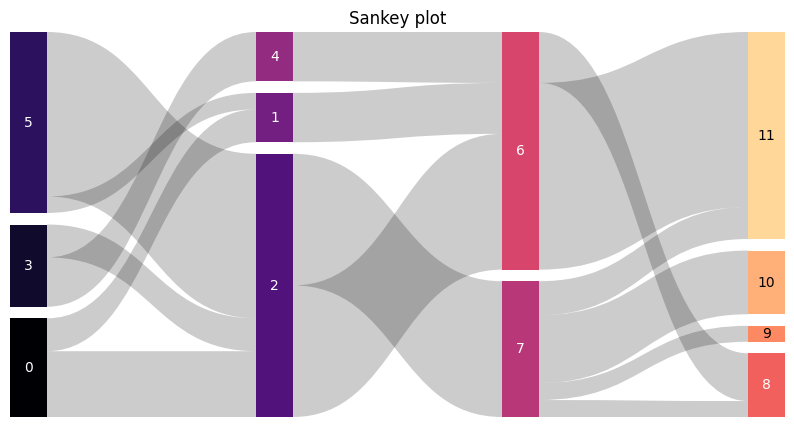

In [2]:
data = [
    [(0, 2, 20), (0, 1, 10), (3, 4, 15), (3, 2, 10), (5, 1, 5), (5, 2, 50)],
    [(2, 6, 40), (1, 6, 15), (2, 7, 40), (4, 6, 15)],
    [(7, 8, 5), (7, 9, 5), (7, 10, 20), (7, 11, 10), (6, 11, 55), (6, 8, 15)],
]

fig, ax = plt.subplots(figsize=(10, 5))
sankey(
    data=data,
    color="magma",
    # color="tab:orange",
    annotate_columns="index",
    ax=ax,
    title="Sankey plot",
    spacing=0.03,
    # annotate_columns_font_color=(0.5, 0.5, 0.5),
)

<Axes: title={'center': 'Sankey plot'}>

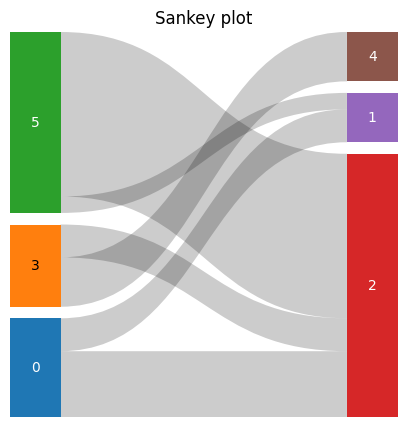

In [3]:
data = [
    [
        (0, 2, 20),
        (0, 1, 10),
        (3, 4, 15),
        (3, 2, 10),
        (5, 1, 5),
        (5, 2, 50),
    ],
]

fig, ax = plt.subplots(figsize=(5, 5))
sankey(
    data=data,
    color="tab10",
    annotate_columns="index",
    ax=ax,
    title="Sankey plot",
    spacing=0.03,
)

<Axes: title={'center': 'Sankey plot'}>

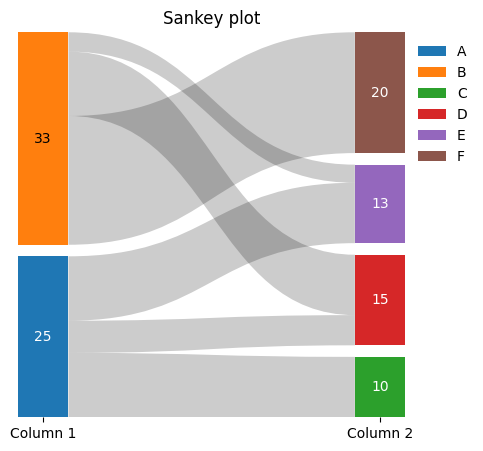

In [4]:
data = [
    [10, 0, 5, 10],
    [0, 20, 10, 3],
]

fig, ax = plt.subplots(figsize=(5, 5))
sankey(
    data=[from_matrix(data)],
    color="tab10",
    annotate_columns="weight",
    title="Sankey plot",
    spacing=0.03,
    ax=ax,
    show_legend=True,
    legend_labels=["A", "B", "C", "D", "E", "F"],
    column_labels=["Column 1", "Column 2"],
    # annotate_columns_font_kwargs={
    #     "color": "white",
    # },
)

In [ ]:
# TODO Add function to provide cmap per column




In [5]:
from matplotlib_sankey._utils import isinstance_list_of
from typing import Any
from matplotlib_sankey._colors import is_hex_color, colormap_to_list, unify_color
from matplotlib import colors

In [6]:
unify_color("tab:red"), unify_color([23, 255, 159])

((0.8392156862745098, 0.15294117647058825, 0.1568627450980392), (23, 255, 159))

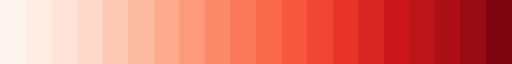

In [7]:
colors.ListedColormap(colormap_to_list("Reds", 20))

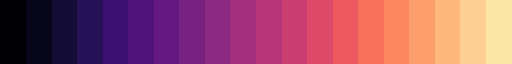

In [8]:
cmap = colormap_to_list("magma", 20)

colors.ListedColormap(cmap)

In [9]:
from matplotlib_sankey._utils import get_luminance, is_light_color

In [10]:
get_luminance([i * 255 for i in cmap[15]], color_range_max=255)

0.6204162284

In [11]:
is_light_color(cmap[11], color_range_max=1, cutoff=0.35)

True